#                                Compte rendu du mini projet n°1

### Introduction
   Ce mini projet a comme objectif la construction d'un modèle reproduisant le mouvement rétrograde de Mars.
Le but est de pouvoir tracer un graphe de la longitude -l'angle que fais Mars dans le référentiel de la terre- qui soit le plus proche possible du graphe des données -de la modélisation 🤷‍♀️.
Pour cela, on va utiliser principalement Python pour coder les formules mathématiques et physiques résolvant le probléme pour cet angle.

### Hypothèses et description du modèle proposé 
Dans cette modélisation, on considère que le mouvement des deux planètes est circulaire uniforme, et que ces deux mouvements se passent dans le même plan.  
On procède de la manière la plus naturelle et qui va consister à :
* Calculer les positions des deux planètes dans le référentiel héliocentrique. On se met en coordonées polaires et on paramètrise ces mouvements par l'équation $R(\cos(\Theta),\sin(\Theta))$. On prend ***R*** -la distance entre la planète et le soleil- en *UA* et ***θ=θ(t)=)2πt/(la periode de revolusion donnée))***, *t* étant en *jours*.
* Ensuite, faire le changement de référentiel Soleil -> Terre en usilisant la formule  
***x<sub>ref terre</sub> = x<sub>ref soleil</sub> - x<sub>terre dans ref soleil<sub/>***.
* Calculer l'angle apparent en appliquant l'inverse de la fonction ***tan*** sur ***Y(t)/X(t)*** -étant les coordonnées de Mars dans le référentiel de la Terre.

### Numérisation et représentation des résultats
Le code suivant a permis de tracer les graphes de la longitude en fonction du temps, à partir des mesures et du modèle proposé.

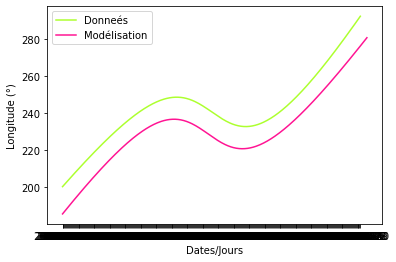

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m

# 1)_ Graphe des donnees :

       #Lecture des donnees
data=pd.read_csv("DataMars.csv", comment='#')

       #Extraction des donnees
t = data["Date"]
L = data["Longitude (decimal)"]
#t=np.arange(L.shape[0])

       #Traçage de la courbe des donnees avec la deuxieme couleure preferee de l'etudiant 21310886
my_slice = slice(292,610)
plt.plot(t[my_slice],L[my_slice], color='greenyellow', label='Donneés')

# plt.plot(t[292:620],L[292:620], color='greenyellow', label='Donneés')


# 2)_ Graphe de la modelisation :

       #Definition du nombre de jours entre le 01/01/2026 et 01/09/2016
#t=np.array([i for i in range(325)])
t=np.arange(325)#.astype(int)

       #Definition des vecteurs position de Mars et de la Terre dans le ref. du soleil  
posiMars=np.array([[1.52371*m.cos((T)*2*m.pi/686.885),1.52371*m.sin((T)*2*m.pi/686.885)] for T in range(1000)]) 
posiTerre=np.array([[m.cos(T*2*m.pi/365.256),m.sin((T)*2*m.pi/365.256)] for T in range(1000)])

      #Calcul de la position de mars dans le ref de la terre
posiMarTer=posiMars-posiTerre

      #Calcul de l'angle apparent en ° en appliquant une correction de +12°
angles=(180/m.pi)*(m.pi+np.arctan2(posiMarTer[625:950,1],posiMarTer[625:950,0]))


      # Tracer le  graphe de la modelisation avec la premiere couleur preferee de l'etudiant 21310886
plt.plot(t,angles, color='deeppink', label='Modélisation')

plt.ylabel('Longitude (°)')
plt.xlabel('Dates/Jours')
plt.legend()

In [2]:
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### Remarques
* On s'est contenté d'un compteur des jours entre les deux dates 01/01/2026 et 01/09/2016 pour tracer la courbe rose pour la facilité que cela a offert lors du codage, ceci ne devant pas engendrer des problèmes de compréhension des graphes puisque les dates sont déjà en abscisses pour la courbe des données brutes.
* On voit, sur la ligne 34 du code, que le modèle a dû être corrigé de +12° pour pouvoir donner une aussi bonne approximation des mesures du phénomène. Ceci est sans doute dû aux hypothèses considérées (uniformité des vitesses en norme, circularité des trajectoires, appartenance des deux courbes au même plan).

In [ ]:
w=range(2,5)
len(w)

### Conclusion
D'aprés la comparaison des deux courbes obtenues, on peut dire qu'on a réussi à reproduire le phénomène de rétrogradation de Mars avec le modèle proposé.